In [2]:
#------------------------------------ASSIGNMENT-6 AVI KHANDELWAL 204102301-------------------------------------------------

#-------------------------------------------------------Q1----------------------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix

#Reading data into pandas dataframe
df = pd.read_csv("C:/Users/avikh/Desktop/SPML_Sem1/ML/Lab/iris.data", names=["sepal length (cm)", "sepal width (cm)","petal length (cm)", "petal width (cm)",'species'])
X = df[["sepal length (cm)","sepal width (cm)","petal length (cm)", "petal width (cm)"]].to_numpy()
y = df['species']
ts = [0.25,0.2]


for i in range(2):
    # Setting test data size as 25% and 20% and selecting the samples randomly for testing and training
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=ts[i]) 
    y_test = y_test.to_numpy()
    # SVM classifer via  scikit-learn and keeping all the additional parameters as default
    classifier = svm.SVC(kernel='linear')
    classifier.fit(X_train,y_train) # Training of SVM classifier
    y_predict = classifier.predict(X_test) # Predicting the output on test data
    # Matrix 1 shows the actual number of data points classified 
    print("\nConfusion matrices for test_size=",ts[i]*100,"%")
    matrix1 = confusion_matrix(y_test, y_predict,labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]) 
    # Matrix 2 gives the normalised values and also the probability of making a correct/wrong classification decision
    matrix2 = confusion_matrix(y_test, y_predict,labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],normalize='true')
    print('\n',"Actual Confusion Matrix\n",matrix1,'\n')
    print("Normalised Confusion Matrix\n",matrix2)


Confusion matrices for test_size= 25.0 %

 Actual Confusion Matrix
 [[13  0  0]
 [ 0 10  1]
 [ 0  0 14]] 

Normalised Confusion Matrix
 [[1.         0.         0.        ]
 [0.         0.90909091 0.09090909]
 [0.         0.         1.        ]]

Confusion matrices for test_size= 20.0 %

 Actual Confusion Matrix
 [[11  0  0]
 [ 0  4  0]
 [ 0  0 15]] 

Normalised Confusion Matrix
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Text(0.5, 1.0, 'Figure7: Final Visualisation using PCA')

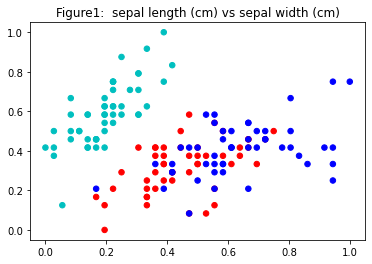

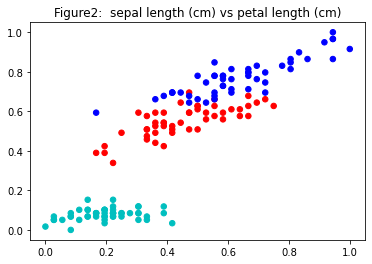

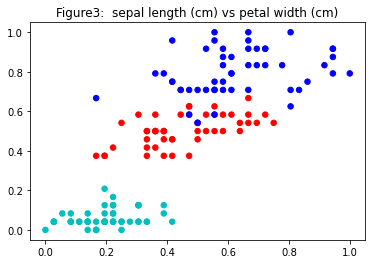

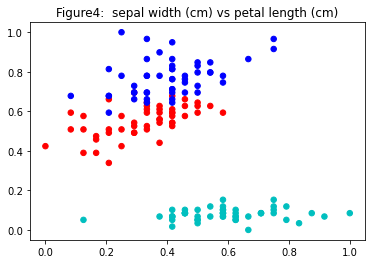

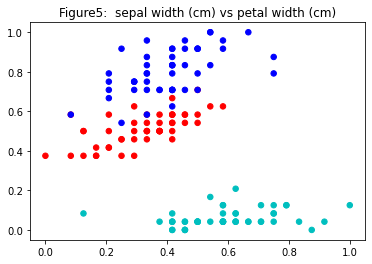

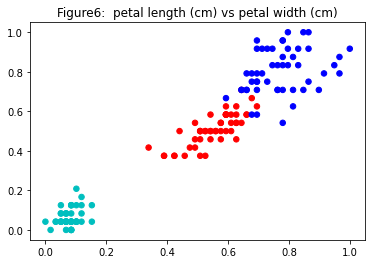

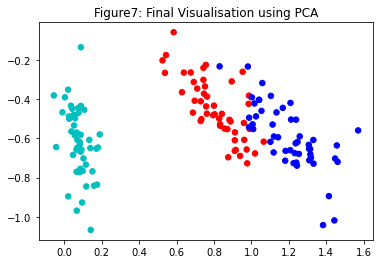

In [270]:
#------------------------------------ASSIGNMENT-6 AVI KHANDELWAL 204102301-------------------------------------------------

#-------------------------------------------------------Q2----------------------------------------------------------------

#Normalizing the Data set using minmax normalisation
df["sepal length (cm)"] = (df["sepal length (cm)"] - df["sepal length (cm)"].min())/(df["sepal length (cm)"].max() - df["sepal length (cm)"].min())
df["sepal width (cm)"] = (df["sepal width (cm)"] - df["sepal width (cm)"].min())/(df["sepal width (cm)"].max() - df["sepal width (cm)"].min())
df["petal length (cm)"] = (df["petal length (cm)"] - df["petal length (cm)"].min())/(df["petal length (cm)"].max() - df["petal length (cm)"].min())
df["petal width (cm)"] = (df["petal width (cm)"] - df["petal width (cm)"].min())/(df["petal width (cm)"].max() - df["petal width (cm)"].min())

lst=["sepal length (cm)", "sepal width (cm)","petal length (cm)", "petal width (cm)"]

label = np.array([np.zeros(50,dtype=int),np.ones(50,dtype=int),2*np.ones(50,dtype=int)]).flatten()
color = np.array(['c','r','b'])

# Visualizing the Dataset containing 3 classes of iris flowers, taking all the 4 features and creating plots pairwise
k=0
for i in range(4):
    for j in range(i+1,4):
        plt.figure(i+j+k)
        plt.scatter(x = df[lst[i]],y = df[lst[j]],c =color[label],s=30)
        plt.title("Figure%i:  %s vs %s" %(i+j+k,lst[i],lst[j]))
    k=1

df = df[["sepal length (cm)", "sepal width (cm)","petal length (cm)", "petal width (cm)"]]

# Calculating mean and Covariance Matrix
mu = df.sum()/150
cov = 0

for i in range(10):
    cov = cov + np.outer(np.array(df.loc[i]-mu),(np.array(df.loc[i]-mu)).transpose())
    
# Eigen Decomposition    
eigvals, eigvecs = la.eig(cov)

P = np.matrix(eigvecs[:,0:2]) # Principal Components
X = np.matrix(df.to_numpy())

Y = X*P # Projecting to new feature space
plt.figure(7)
plt.scatter(x = np.array(Y[:,0]),y = np.array(Y[:,1]),c =color[label],s=30) # Final Visualization
plt.title("Figure7: Final Visualisation using PCA")

